<a href="https://colab.research.google.com/github/yusefmustafa/PRML/blob/master/Yusef_Mustafa_ch01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/MyDrive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/MyDrive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/MyDrive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/discrete.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/

In [7]:
# 3. Add the project directory to the path
%cd /content/drive/MyDrive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/ml-notebooks/PRML


In [8]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

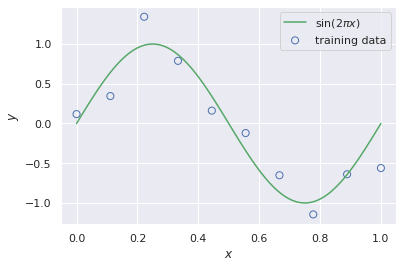

In [11]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

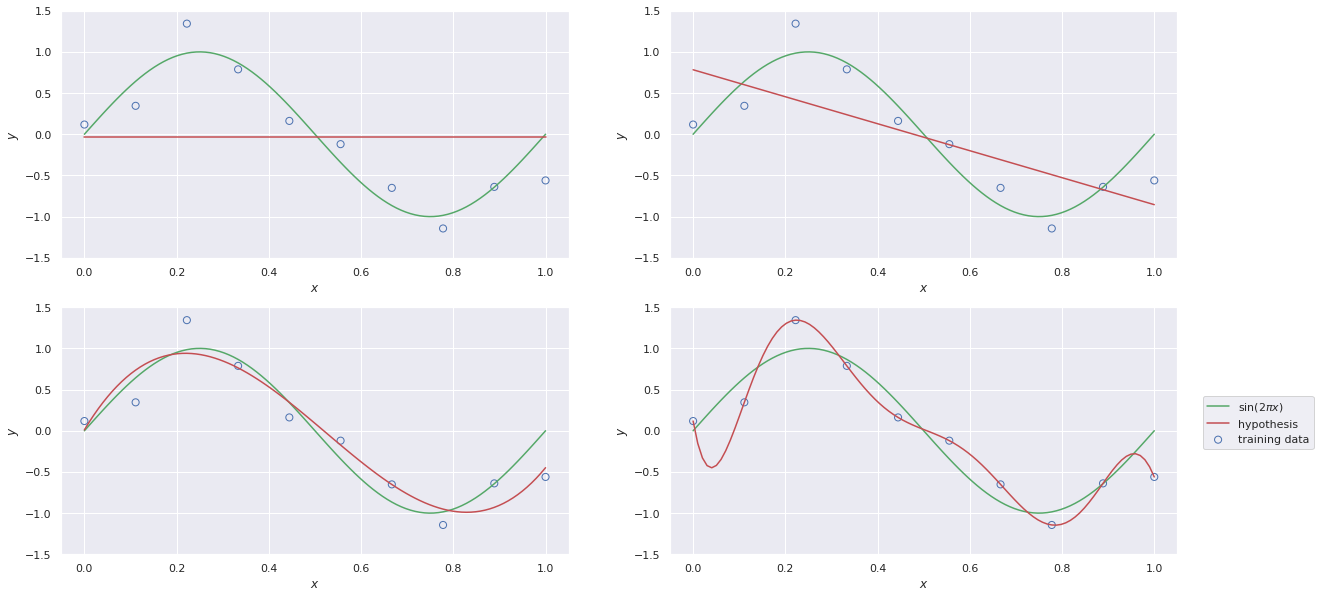

In [12]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

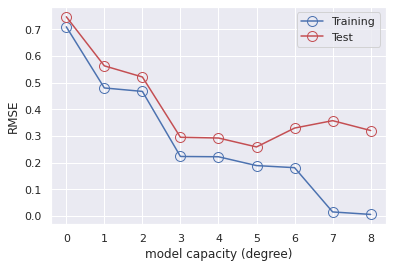

In [13]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(9):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Loss function:**

In many regression plots, the RMSE is the go-to loss function to use. Our goal is to minimize this value. To find the RMSE, we need the residual and observed values so that we can plug-in to this formula:


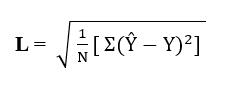

The RMSE can be though of as the average distance between the observed values and residual values. We need the square root to get the exact measurement units, otherwise our loss function would be MSE.



**Model complexity:**

The test error (RMSE) is worse for M = 9 due to overfitting. We can see overfitting starting to occur right after M = 5. A less complicated model (M=3) is much better. To avoid overfitting, we can use regularization. Regularization introduces a penalty parameter so that the data will not overfit.

#### Regularization

Parameter Table: 

   M                                                                                                                                                                                                  Weights
0  1                                                                                                                                                                 [0.781946222737523, -1.6358905809429818]
1  3                                                                                                                        [0.28212486163035233, 5.260200251055201, -16.619993858395187, 10.438565558712986]
2  6                                                             [0.21000967287358055, 4.934071482469222, -10.261320691491852, -2.313830221387145, 3.54967560054156, 3.7375824581913286, -0.2939937691113871]
3  9  [0.1773845150322207, 5.325991502567686, -10.022968462663732, -4.316694692949922, 1.8217178082960006, 4.534649281475541, 4.395485647802488, 2.4293431872

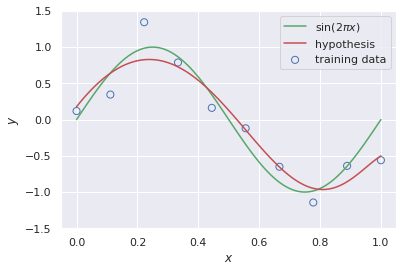

In [84]:
import pandas
import math

def weights(m, x_train, x_test):
    feature = PolynomialFeature(m)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    return model.w

def norm_weights_squared(m, x_train, x_test):
    feature = PolynomialFeature(m)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    return math.sqrt(sum(np.square(model.w)))

# Parameter table:

m_values = np.array([1, 3, 6, 9])
weights_values = np.array([weights(1, x_train, x_test), weights(3, x_train, x_test), weights(6, x_train, x_test), weights(9, x_train, x_test)], dtype="object")
norm_weights_squared = np.array([norm_weights_squared(1, x_train, x_test), norm_weights_squared(3, x_train, x_test), norm_weights_squared(6, x_train, x_test), norm_weights_squared(9, x_train, x_test)], dtype="object")
df = pandas.DataFrame({"M": m_values, "Weights": weights_values})
pandas.set_option('display.max_colwidth', None)
print("Parameter Table: \n")
print(df)
print("\nSquared Norm Weights: " + str(norm_weights_squared))

feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

**Regularization**

The output of this is a ridge regresssion normalization which shrinks the dynamic range of the weights. The alpha parameter (1e-3) can be thought of as our λ in this case for our equation:

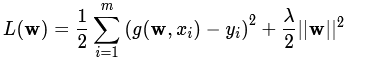

If we increase the alpha parameter, we should see a more stable model. However, this will increase bias and reduce variance (we can see this when we try making the parameter alpha=1e-2.


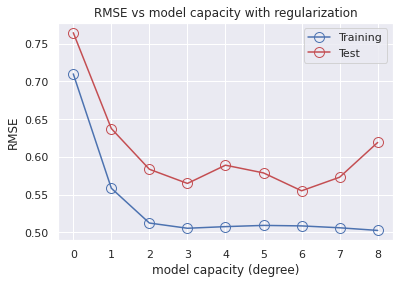

In [81]:
# Plotting RMSE vs model capacity with regularization

def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(9):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.title("RMSE vs model capacity with regularization")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### 1.2.6 Bayesian curve fitting

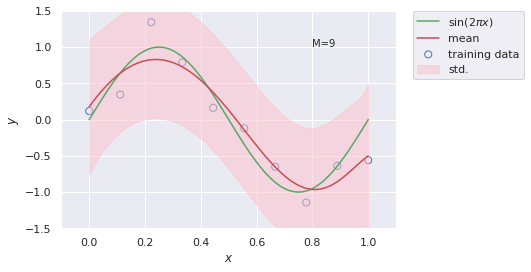

In [86]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()